In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

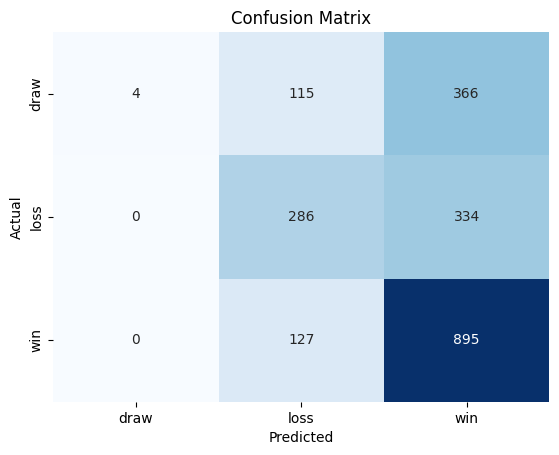

In [9]:
matrix = np.load('dump/confusion_matrix.npy')

sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['draw', 'loss', 'win'], yticklabels=['draw', 'loss', 'win'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("graphs/confusion_matrix.png")
plt.show()
plt.close()

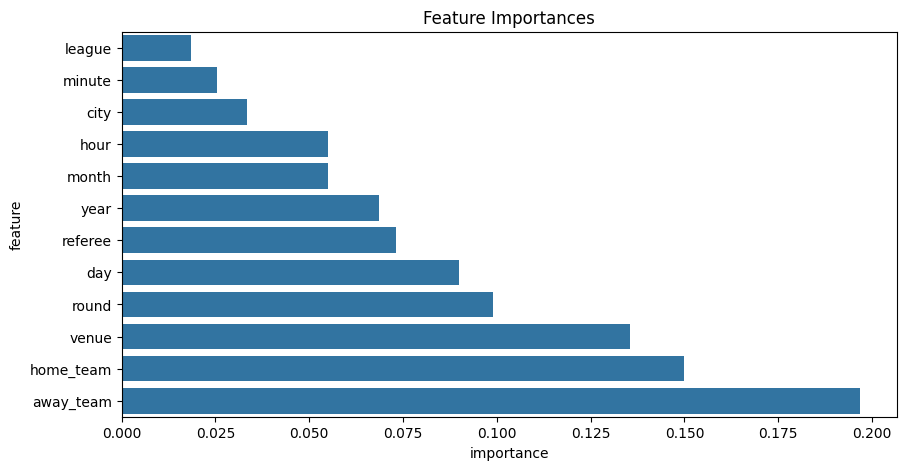

In [10]:
df_importances = pd.read_csv("dump/df_importances.csv")

plt.figure(figsize=(10,5))
sns.barplot(x='importance', y='feature', data=df_importances)
plt.title('Feature Importances')
plt.savefig("graphs/feature_importances.png")
plt.show()

In [11]:
df_cleaned = pd.read_csv('dump/df_cleaned.csv')

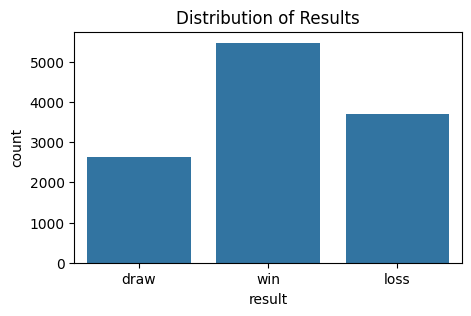

In [12]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df_cleaned, x='result')
plt.title('Distribution of Results')
plt.savefig("graphs/distribution_of_results.png")
plt.show()

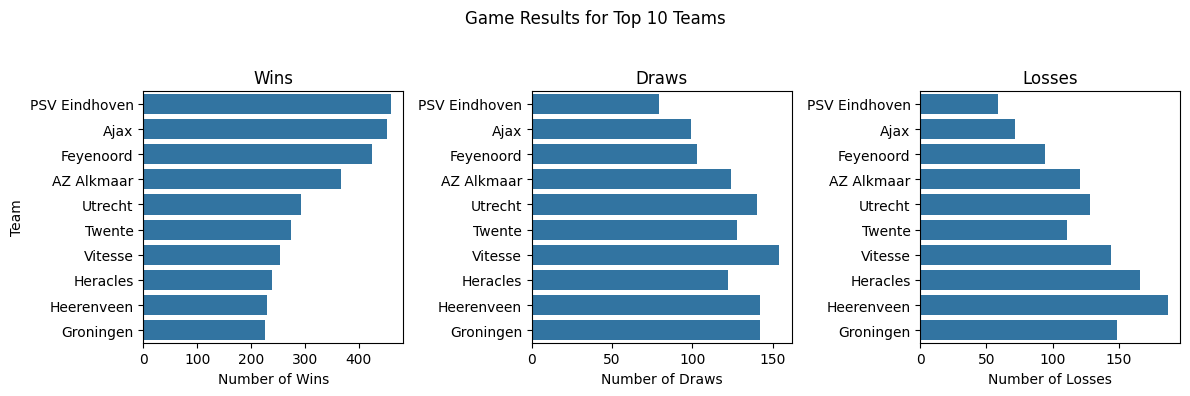

In [13]:
team_win_counts = df_cleaned[df_cleaned['result'] == 'win'].groupby('home_team').size().sort_values(ascending=False)
top10_teams = team_win_counts.head(10).index

df_top = df_cleaned[df_cleaned['home_team'].isin(top10_teams)]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot voor Wins
df_wins = df_top[df_top['result'] == 'win']
sns.countplot(data=df_wins, y='home_team', order=top10_teams, ax=axes[0])
axes[0].set_title('Wins')
axes[0].set_xlabel('Number of Wins')
axes[0].set_ylabel('Team')

# Plot voor Draws
df_draws = df_top[df_top['result'] == 'draw']
sns.countplot(data=df_draws, y='home_team', order=top10_teams, ax=axes[1])
axes[1].set_title('Draws')
axes[1].set_xlabel('Number of Draws')
axes[1].set_ylabel('')

# Plot voor Losses
df_losses = df_top[df_top['result'] == 'loss']
sns.countplot(data=df_losses, y='home_team', order=top10_teams, ax=axes[2])
axes[2].set_title('Losses')
axes[2].set_xlabel('Number of Losses')
axes[2].set_ylabel('')

plt.suptitle('Game Results for Top 10 Teams')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("graphs/results_top10_teams.png")
plt.show()

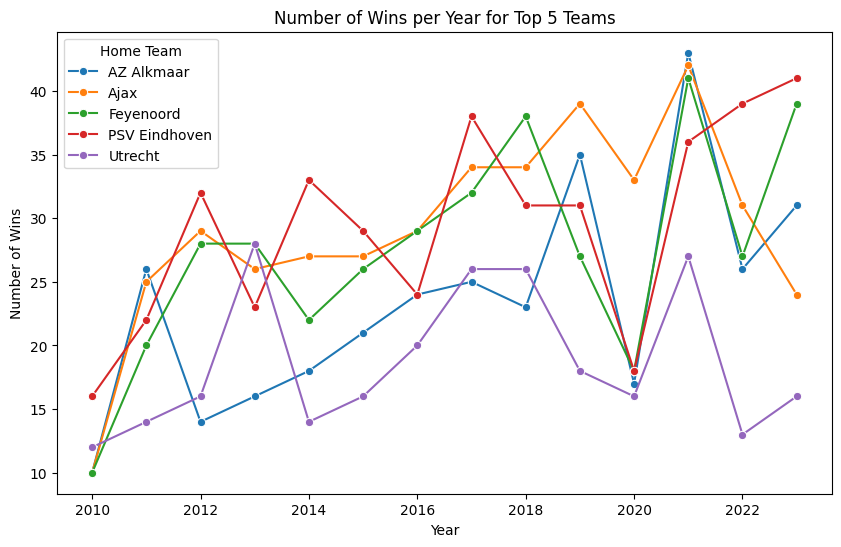

In [14]:
df_wins = df_cleaned[df_cleaned['result'] == 'win']

team_win_counts = df_wins.groupby('home_team').size().sort_values(ascending=False)

top5_teams = team_win_counts.head(5).index

df_top5_wins = df_wins[df_wins['home_team'].isin(top5_teams)]

wins_per_year = df_top5_wins.groupby(['year', 'home_team']).size().reset_index(name='wins')

wins_per_year = wins_per_year[wins_per_year['year'] < 2024]

plt.figure(figsize=(10,6))
sns.lineplot(data=wins_per_year, x='year', y='wins', hue='home_team', marker='o')
plt.title('Number of Wins per Year for Top 5 Teams')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.legend(title='Home Team')
plt.savefig("graphs/wins_per_year_top5_teams.png")
plt.show()